In [446]:
import numpy as np
import matplotlib.pyplot as plt

tau = np.pi*2
radius = 50

In [447]:
def draw_segment(p1,p2):
    x1,x2 = p1[0], p2[0]
    y1,y2 = p1[1], p2[1]
    plt.plot([x1,x2],[y1,y2],'black',linewidth='0.5')

In [448]:
chords = []

for i in range(1000):
    # generate random angles
    a1 = np.random.random() * tau
    a2 = np.random.random() * tau
    # generate points from angles
    p1 = (radius * (np.cos(a1) + 1), radius * (np.sin(a1) + 1))
    p2 = (radius * (np.cos(a2) + 1), radius * (np.sin(a2) + 1))
    chords.append((p1,p2))


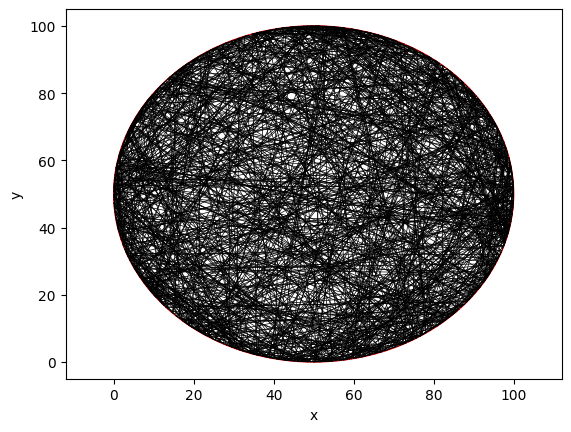

In [449]:
circle = plt.Circle((radius, radius), radius, color='red', fill=False)

fig, ax = plt.subplots()
ax.set_xlabel('x'), ax.set_ylabel('y')
ax.set_xlim((-12, radius * 2 + 12)), ax.set_ylim((-5, radius * 2 + 5))
ax.add_artist(circle)

for i in range(len(chords)):
    draw_segment(chords[i][0],chords[i][1])